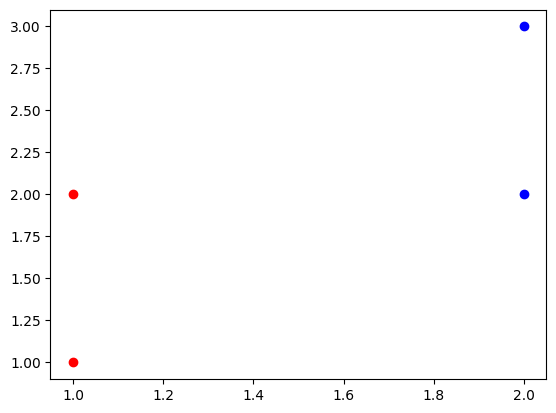

1.3745608042526118
Init Score: 0.5
Final Cost:  0.3135890596367973


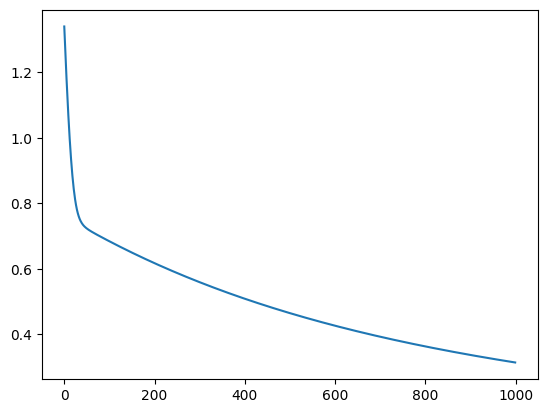

Final Score:  1.0


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([0,0, 1, 1])

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

def logistic_function(z):
    return 1.0 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = X.shape[0]
    h = logistic_function(X.dot(theta))
    return -(1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))

def gradient(X, y, theta):
    h = logistic_function(X.dot(theta))
    return  X.T.dot(h-y)

def gradient_descent(X, y, theta, alpha, num_iters):
    j_history = []
    for i in range(num_iters):
        theta = theta - alpha * gradient(X, y, theta)
        j_history.append(cost_function(X, y, theta))
    return theta, j_history



X = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.random.rand(X.shape[1])

init_cost = cost_function(X, y, theta)
print(init_cost)
init_score = accuracy_score(y, logistic_function(X.dot(theta)) > 0.5)
print("Init Score:",init_score)

theta, j_history = gradient_descent(X, y, theta, 0.01, 1000)

print("Final Cost: ", j_history[-1])

plt.plot(j_history)
plt.show()

print("Final Score: ", accuracy_score(y, logistic_function(X.dot(theta)) > 0.5))



